In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import preprocessing
from keras.layers import Input, Dense, Activation, Flatten, Dropout, Reshape
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.models import Model
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(iris['target_names'])
print(iris['feature_names'])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
iris_targets  = iris['target']
iris_features = iris['data']
print(iris_features.shape)
print(iris_targets .shape)

(150, 4)
(150,)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_targets, train_size=0.8, test_size=0.2)

In [7]:
# one hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(120, 3)
(30, 3)


In [0]:
# 正規化
#x_train = preprocessing.minmax_scale(x_train)
#x_test = preprocessing.minmax_scale(x_test)

In [0]:
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]

batch_size = 20
epochs = 150

In [10]:
inputs = Input(shape=(input_dim,))
x = inputs

x = Dense(32)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(8)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(output_dim)(x)
predictions = Activation('softmax')(x)

In [11]:
model = Model(input=inputs, output=predictions)
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
batch_normalization_2 (Batch (None, 8)                 32        
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
  """Entry point for launching an IPython kernel.


In [12]:
history = model.fit(
    x = x_train, 
    y = y_train,
    batch_size = batch_size,
    epochs = epochs, 
    validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 96 samples, validate on 24 samples
Epoch 1/150





96/96 [==============================] - 2s 16ms/step - loss: 1.1375 - acc: 0.4167 - val_loss: 1.3214 - val_acc: 0.2500
Epoch 2/150
96/96 [==============================] - 0s 485us/step - loss: 1.0302 - acc: 0.3958 - val_loss: 1.2602 - val_acc: 0.2500
Epoch 3/150
96/96 [==============================] - 0s 397us/step - loss: 1.0350 - acc: 0.4271 - val_loss: 1.2306 - val_acc: 0.2500
Epoch 4/150
96/96 [==============================] - 0s 345us/step - loss: 0.9006 - acc: 0.4375 - val_loss: 1.1868 - val_acc: 0.2500
Epoch 5/150
96/96 [==============================] - 0s 378us/step - loss: 0.9170 - acc: 0.4896 - val_loss: 1.1364 - val_acc: 0.2500
Epoch 6/150
96/96 [==============================] - 0s 341us/step - loss: 0.8242 - acc: 0.4896 - val_loss: 1.0966 - val_acc: 0.2500
Epoch 7/150
96/96 [==============================] - 0s 4

In [0]:
def compare_TV(history):
    import matplotlib.pyplot as plt

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.plot(epochs, loss, 'bo' ,label = 'training loss')
    plt.plot(epochs, val_loss, 'b' , label= 'validation loss')
    plt.title('Training and Validation loss')
    plt.legend()

    plt.show()

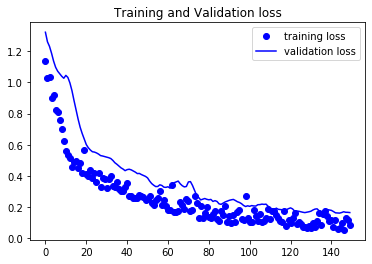

In [14]:
compare_TV(history)

In [15]:
model.evaluate(x_test, y_test, batch_size=1)

30/30 [==============================] - 0s 2ms/step


[0.05710301277770971, 1.0]